In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df =pd.read_csv("bank-additional-full.csv",sep=";")

In [6]:
df.shape

(41188, 21)

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Lets see how many "unknown" values are there in each column

In [11]:
df.apply(lambda x:sum(x=="unknown"),axis=0)

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

# lets replace these "unknown" values with nan for easier processing

In [18]:
df["job"]=df["job"].replace({"unknown":np.nan})
df["marital"]=df["marital"].replace({"unknown":np.nan})
df["education"]=df["education"].replace({"unknown":np.nan})
df["default"]=df["default"].replace({"unknown":np.nan})
df["housing"]=df["housing"].replace({"unknown":np.nan})
df["loan"]=df["loan"].replace({"unknown":np.nan})


In [19]:
df.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [23]:
df["job"].value_counts(normalize=True)*100


admin.           25.507856
blue-collar      22.649175
technician       16.503500
services          9.714132
management        7.156493
retired           4.209702
entrepreneur      3.563562
self-employed     3.477899
housemaid         2.594351
unemployed        2.481766
student           2.141563
Name: job, dtype: float64

In [24]:
df["marital"].value_counts(normalize=True)*100

married     60.640265
single      28.140508
divorced    11.219227
Name: marital, dtype: float64

In [25]:
df["education"].value_counts(normalize=True)*100

university.degree      30.838634
high.school            24.114859
basic.9y               15.320475
professional.course    13.287883
basic.4y               10.583673
basic.6y                5.808855
illiterate              0.045619
Name: education, dtype: float64

In [26]:
df["default"].value_counts(normalize=True)*100

no     99.990795
yes     0.009205
Name: default, dtype: float64

In [27]:
df["housing"].value_counts(normalize=True)*100

yes    53.674312
no     46.325688
Name: housing, dtype: float64

In [28]:
df["loan"].value_counts(normalize=True)*100

no     84.456938
yes    15.543062
Name: loan, dtype: float64

in job filed there are many categories like retired,entrepreneur,self-employed,housemaid,unemployed,student have very low percentage so we can convert them to others
,in education filed same is for basic.4y,basic.6y needs to be converted into others



In [29]:
df.loc[df["job"].isin(["retired","entrepreneur","self-employed","housemaid","unemployed","student"]),"job"]="others"

In [31]:
df["job"].value_counts(normalize=True)*100

admin.         25.507856
blue-collar    22.649175
others         18.468843
technician     16.503500
services        9.714132
management      7.156493
Name: job, dtype: float64

In [32]:
df.loc[df["education"].isin(["basic.4y","basic.6y"]),"education"]="others"

In [33]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [34]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

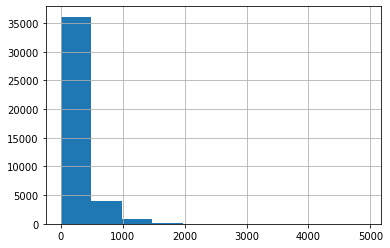

In [37]:
df["duration"].hist()

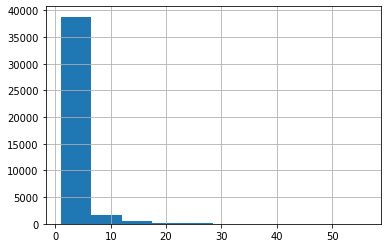

In [38]:
df["campaign"].hist()

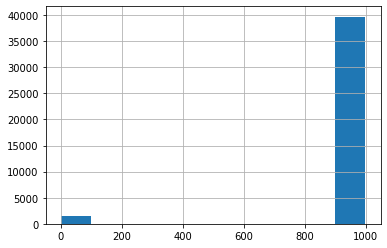

In [40]:
df["pdays"].hist()

pdays seems like binary value in certain ranges,why dont we convert it into categories or define label

In [42]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

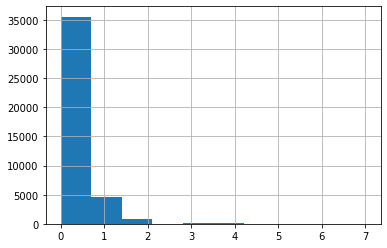

In [41]:
df["previous"].hist()

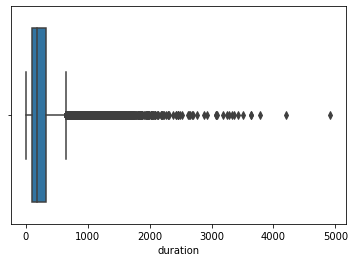

In [45]:
import seaborn as sns
sns.boxplot(df["duration"])

In [46]:
df.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

lets separate categorical and number variables for null imputation

In [49]:
cat_df = df.select_dtypes(include=['object'])
y= cat_df["y"]
cat_df.drop("y",axis=1,inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
cat_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,others,married,others,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,others,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [52]:
num_df = df.select_dtypes(exclude=['object'])

In [53]:
num_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [54]:
num_df.shape[1]+cat_df.shape[1]

20

lets replace null in categories with mode and numerical with mean for now before building the model

In [56]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean') # we will use strategy='most_frequent' to impute with mode

bank_imp_mean = imp_mean.fit_transform(num_df)

num_df_imp_mean = pd.DataFrame(bank_imp_mean, columns=num_df.columns)

In [57]:
num_df_imp_mean.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0


In [58]:
imp_mode = SimpleImputer(strategy='most_frequent') # we will use strategy='most_frequent' to impute with mode

bank_imp_mode = imp_mode.fit_transform(cat_df)

cat_df_imp_mode = pd.DataFrame(bank_imp_mode, columns=cat_df.columns)

In [59]:
cat_df_imp_mode.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,others,married,others,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,others,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [60]:
cat_df_imp_mode.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,others,married,others,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,others,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [68]:
df2 =pd.concat([num_df_imp_mean,cat_df_imp_mode,y],axis=1)

In [69]:
df2.shape

(41188, 21)

In [70]:
num_df.shape

(41188, 10)

In [71]:
num_df_imp_mean.shape

(41188, 10)

In [72]:
cat_df_imp_mode.shape

(41188, 10)

In [67]:
len(y)

41188

lets build model now

lets convert all categorical into dummies first before feeding to model

In [89]:
cat_df.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [91]:
df2['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [92]:
df_with_dummies = pd.get_dummies(df2, prefix='job_', columns=['job'])
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='marital_', columns=['marital'])
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='education_', columns=['education'])
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='default_', columns=['default'])
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='housing_', columns=['housing'])
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='loan_', columns=['loan'])
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='contact_', columns=['contact'])
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='poutcome_', columns=['poutcome'])

In [95]:
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='month_', columns=['month'])
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='day_of_week_', columns=['day_of_week'])

convert target into 0,1

In [107]:
df_with_dummies["y"]=df_with_dummies["y"].replace({"yes":1,"no":0})

In [108]:
df["y"].dtypes

dtype('O')

In [109]:
df_with_dummies.dtypes

age                               float64
duration                          float64
campaign                          float64
pdays                             float64
previous                          float64
emp.var.rate                      float64
cons.price.idx                    float64
cons.conf.idx                     float64
euribor3m                         float64
nr.employed                       float64
y                                   int64
job__admin.                         uint8
job__blue-collar                    uint8
job__management                     uint8
job__others                         uint8
job__services                       uint8
job__technician                     uint8
marital__divorced                   uint8
marital__married                    uint8
marital__single                     uint8
education__basic.9y                 uint8
education__high.school              uint8
education__illiterate               uint8
education__others                 

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,classification_report

In [110]:
X= df_with_dummies.drop("y",axis=1)
y=df_with_dummies["y"]

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [112]:
log_clf=LogisticRegression()
log_model = log_clf.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [114]:
log_pred = log_model.predict(X_test)
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.40      0.50       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [115]:
print("Accuracy is of logistic model: ",accuracy_score(y_test,log_pred))


Accuracy is of logistic model:  0.9100509832483612


In [116]:
print("f1 score for logistic model is: ",f1_score(y_test, log_pred))


f1 score for logistic model is:  0.5043478260869565


In [118]:
print("recall score for logistic model is: ",recall_score(y_test, log_pred))

recall score for logistic model is:  0.4032085561497326


32884    no
3169     no
32206    no
9403     no
14020    no
Name: y, dtype: object

In [120]:
df_with_dummies["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [121]:
print("Accuracy is of logistic model: ",accuracy_score(y_test,log_pred))
print("f1 score for logistic model is: ",f1_score(y_test, log_pred))
print("recall score for logistic model is: ",recall_score(y_test, log_pred))

Accuracy is of logistic model:  0.9100509832483612
f1 score for logistic model is:  0.5043478260869565
recall score for logistic model is:  0.4032085561497326


since it has imbalance class our metric should be f1 score, lets try other models

In [122]:
tree_clf=DecisionTreeClassifier()
tree_model = tree_clf.fit(X_train,y_train)
tree_pred = tree_model.predict(X_test)
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           1       0.50      0.53      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



In [123]:
print("Accuracy  of tree model: ",accuracy_score(y_test,tree_pred))
print("f1 score for tree model is: ",f1_score(y_test, tree_pred))
print("recall score for tree model is: ",recall_score(y_test, tree_pred))

Accuracy  of tree model:  0.885773245933479
f1 score for tree model is:  0.5136950904392764
recall score for tree model is:  0.5315508021390374


decision tree is slightly better than logistic

In [128]:
forest_clf=RandomForestClassifier(n_estimators=500)
forest_model = forest_clf.fit(X_train,y_train)
forest_pred = forest_model.predict(X_test)
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           1       0.50      0.53      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



In [129]:
print("Accuracy  of tree model: ",accuracy_score(y_test,forest_pred))
print("f1 score for tree model is: ",f1_score(y_test, forest_pred))
print("recall score for tree model is: ",recall_score(y_test, forest_pred))

Accuracy  of tree model:  0.9140568099053168
f1 score for tree model is:  0.5661764705882353
recall score for tree model is:  0.49411764705882355


here random forest tree performs better than any other model